In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats/data")

Skipping, found downloaded files in "./dogs-vs-cats" (use force=True to force download)


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 100,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 100,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
 def process(image,label):
     image = tf.cast(image/255. ,tf.float32)
     return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,681 (56.64 MB)

 Trainable params: 14,847,489 (56.64 MB)

 Non-trainable params: 192 (768.00 B)

In [18]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_ds, epochs=50, validation_data=validation_ds, callbacks=[early_stop])


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 227ms/step - accuracy: 0.5384 - loss: 3.3075 - val_accuracy: 0.5002 - val_loss: 0.9203
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.6437 - loss: 0.6205 - val_accuracy: 0.5552 - val_loss: 0.6822
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 78s 224ms/step - accuracy: 0.6761 - loss: 0.5824 - val_accuracy: 0.6880 - val_loss: 0.5638
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 84s 235ms/step - accuracy: 0.7040 - loss: 0.5551 - val_accuracy: 0.7464 - val_loss: 0.5177
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 224ms/step - accuracy: 0.7433 - loss: 0.5104 - val_accuracy: 0.7384 - val_loss: 0.5239
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 84s 234ms/step - accuracy: 0.7528 - loss: 0.4917 - val_accuracy: 0.7552 - val_loss: 0.4831
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 223ms/step - accuracy: 0.7706 - loss: 0.4570 - val_accuracy: 0.7560 - val_loss: 0.5031
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 245ms/step - accuracy: 0.7932 - loss: 0

In [11]:

history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']


epochs = range(1, len(train_loss) + 1)


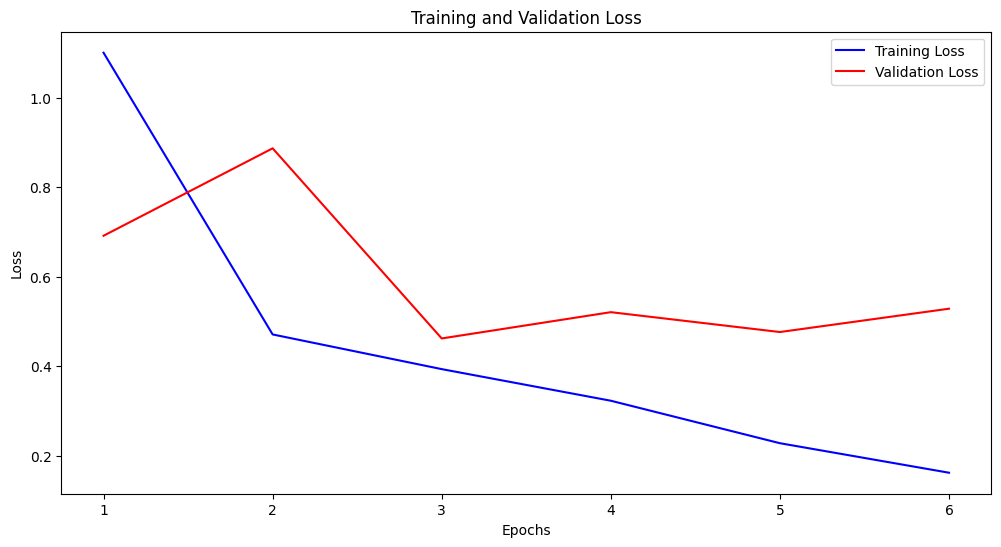

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.plot(epochs, train_loss, label='Training Loss', color='blue')

plt.plot(epochs, val_loss, label='Validation Loss', color='red')


plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img = cv2.imread('/content/kitty-cat-kitten-pet-45201.jpeg')

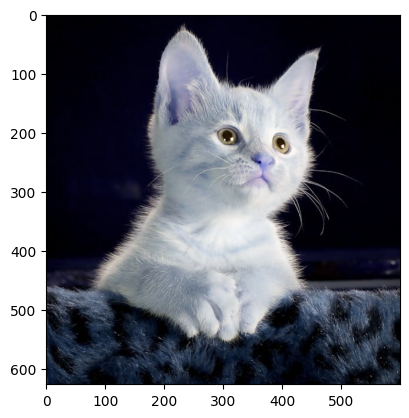

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape
import numpy as np

In [ ]:
test_img = cv2.resize(test_img,(256,256))

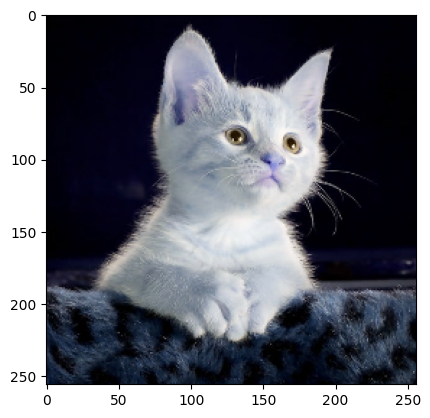

In [ ]:
plt.imshow(test_img)

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.]], dtype=float32)